# Overview of strip steel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import ndimage

from glob import glob

## How many images?

In [2]:
images = glob('/Volumes/DATA/strip_steel/images/*/*.jpg')
print('total images: %d' % len(images))

total images: 554


## How many classes?

In [3]:
classes = []
for image_file in images:
    classes.append(image_file.split('/')[-2])

import collections

counter=collections.Counter(classes)
print(counter)

Counter({'emulsion_spot': 272, 'peeling_wire': 127, 'black_spot': 116, 'rust_spot': 39})


## Some examples

plotting black_spot


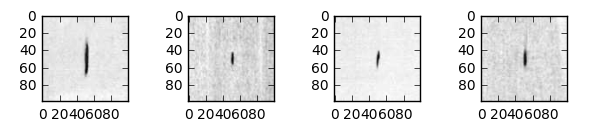

plotting emulsion_spot


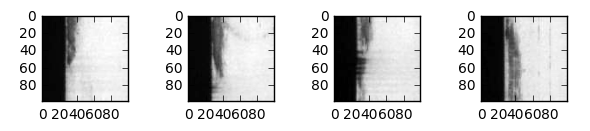

plotting rust_spot


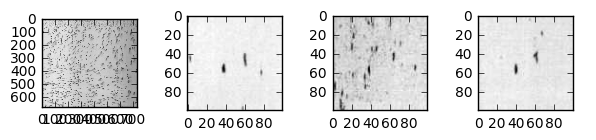

plotting peeling_wire


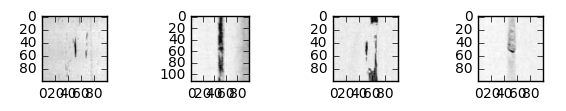

In [4]:
import random

examples = 4
for i,class_ in enumerate(counter.keys()):
    print('plotting %s' % class_)
    indices = [_n for _n,x in enumerate(classes) if x == class_]
    random_indices = random.sample(indices, k=examples)
    for j in range(examples):
        img = ndimage.imread(images[random_indices[j]])
        plt.subplot('%d%d%d' % (i+1, examples, j+1))
        plt.imshow(img, cmap='gray')
    plt.tight_layout()
    plt.show()
    

## Image size distribution

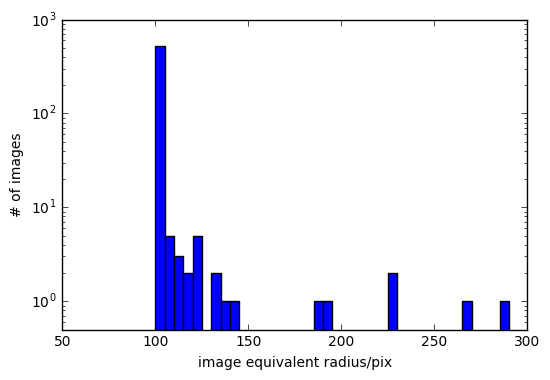

In [12]:
from math import sqrt

sizes = []
for i,image_file in enumerate(images):
    img = ndimage.imread(image_file)
    shape = img.shape
    sizes.append(sqrt(shape[0]*shape[1]))

r = plt.hist(sizes, bins=np.arange(90,300,5), log=True)
plt.xlabel('image equivalent radius/pix')
plt.ylabel('# of images')
plt.ylim(ymin=0.5)
plt.show()